# Stringency index

In [1]:
from datetime import datetime
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read data from "https://www.nature.com/articles/s41562-021-01079-8"
# C7 Movement restrictions
c7 = pd.read_csv('c7_movementrestrictions.csv')
c7 = c7.loc[c7['country_code'].isin(['DNK','FIN','ISL','NOR','SWE'])]
c7.reset_index(inplace=True,drop=True)
c7 = c7.drop(columns=['Unnamed: 0','country_code'])
c7 = c7.transpose()
c7.columns = c7.iloc[0]
c7 = c7.reset_index(drop=False)
c7 = c7.rename(columns={'index':'date'})

c7 = c7[1:]
c7['date'] = c7['date'].apply(lambda x: datetime.strptime(x, "%d%b%Y"))
c7 = c7.set_index(c7['date'])
c7 = c7.loc["2020-01-01":"2021-02-28"]
display(c7.head())

country_name,date,Denmark,Finland,Iceland,Norway,Sweden
date,,,,,,
2020-01-01,2020-01-01,0.0,0.0,0.0,0.0,0.0
2020-01-02,2020-01-02,0.0,0.0,0.0,0.0,0.0
2020-01-03,2020-01-03,0.0,0.0,0.0,0.0,0.0
2020-01-04,2020-01-04,0.0,0.0,0.0,0.0,0.0
2020-01-05,2020-01-05,0.0,0.0,0.0,0.0,0.0


In [3]:
# C8 International Travel
c8 = pd.read_csv('c8_internationaltravel.csv')
c8 = c8.loc[c8['country_code'].isin(['DNK','FIN','ISL','NOR','SWE'])]
c8.reset_index(inplace=True,drop=True)
c8 = c8.drop(columns=['Unnamed: 0','country_code'])
c8 = c8.transpose()
c8.columns = c8.iloc[0]
c8 = c8.reset_index(drop=False)
c8 = c8.rename(columns={'index':'date'})
c8 = c8[1:]
c8['date'] = c8['date'].apply(lambda x: datetime.strptime(x, "%d%b%Y"))
c8 = c8.set_index(c8['date'])
c8 = c8.loc["2020-01-01":"2021-02-28"]
display(c8.head())

country_name,date,Denmark,Finland,Iceland,Norway,Sweden
date,,,,,,
2020-01-01,2020-01-01,0.0,0.0,0.0,0.0,0.0
2020-01-02,2020-01-02,0.0,0.0,0.0,0.0,0.0
2020-01-03,2020-01-03,0.0,0.0,0.0,0.0,0.0
2020-01-04,2020-01-04,0.0,0.0,0.0,0.0,0.0
2020-01-05,2020-01-05,0.0,0.0,0.0,0.0,0.0


In [4]:
c8 = c8.rename(columns={'Denmark':'DKC8','Finland':'FIC8','Iceland':'ISC8','Norway':'NOC8','Sweden':'SEC8'})

In [5]:
# Combine dataframes
combined = pd.concat([c7,c8], axis=1)
combined['DK_comb'] = combined['Denmark'] + combined['DKC8']
combined['FI_comb'] = combined['Finland'] + combined['FIC8']
combined['IS_comb'] = combined['Iceland'] + combined['ISC8']
combined['NO_comb'] = combined['Norway'] + combined['NOC8']
combined['SE_comb'] = combined['Sweden'] + combined['SEC8']
combined.reset_index(inplace=True, drop=True)
combined = combined[['DK_comb','FI_comb','IS_comb','NO_comb','SE_comb']]
combined = combined.rename(columns={'DK_comb':'Denmark','FI_comb':'Finland','IS_comb':'Iceland','NO_comb':'Norway','SE_comb':'Sweden'})
combined = combined.fillna(0)
combined = combined.transpose()
display(combined.head())

,0,1,2,3,4,5,6,7,8,9,...,415,416,417,418,419,420,421,422,423,424
country_name,,,,,,,,,,,,,,,,,,,,,
Denmark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Finland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Iceland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Norway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Sweden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


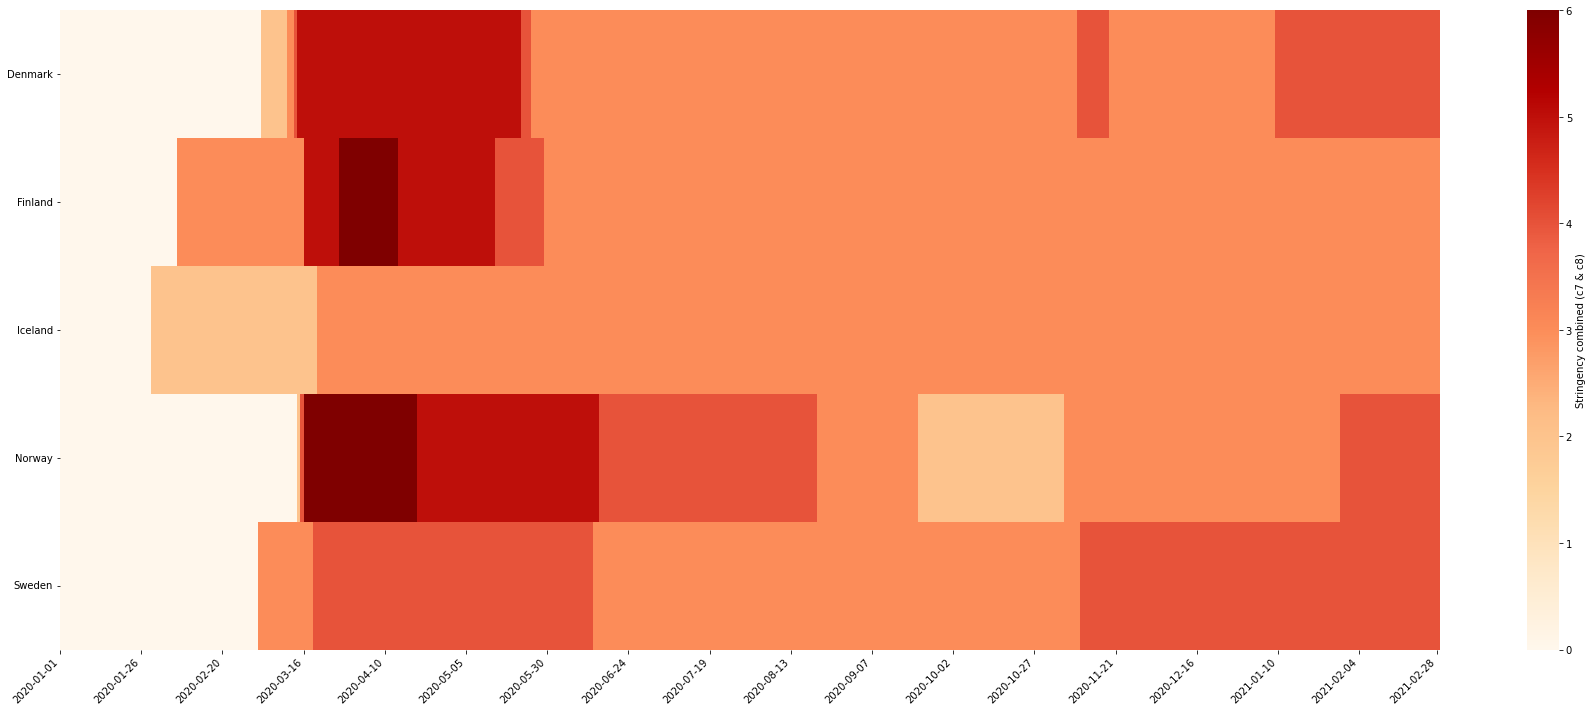

In [6]:
# Plot
f, ax = plt.subplots(ncols=1, figsize=(25,10))
heat = sns.heatmap(combined, cmap='OrRd', cbar_kws={'label': 'Stringency combined (c7 & c8)'}, xticklabels=True)
ax.set_ylabel(None)
plt.yticks(rotation=360)
x_dates = c8['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
x_dates = x_dates[[0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,424]]
ax.set(xticks=([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,424]))
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
f.subplots_adjust(bottom=0.20)
plt.tight_layout()
